# Reading dataset 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
#reading dataset
df=pd.read_csv('barclays_transactions.csv')

In [3]:
df.head(1000)

,TransactionID,CustomerID,TransactionType,Amount,MerchantCategory,IsFraud,TransactionDate
0,200000,110373,ATM Withdrawal,9.807356,Dining,0,2024-05-09 21:08:04.760169
1,200001,144536,Cheque,39.849237,Healthcare,0,2025-02-03 21:08:04.760188
2,200002,105148,Cheque,24.812904,Others,0,2025-03-20 21:08:04.760191
3,200003,105086,ATM Withdrawal,48.444194,Electronics,0,2024-11-12 21:08:04.760193
4,200004,143481,ATM Withdrawal,49.474473,Travel,0,2024-11-27 21:08:04.760194
...,...,...,...,...,...,...,...
995,200995,101629,Online Payment,15.968183,Healthcare,0,2024-11-17 21:08:04.761080
996,200996,144267,Wire Transfer,44.989921,Groceries,0,2024-05-16 21:08:04.761080
997,200997,135403,POS,41.927962,Entertainment,0,2024-06-04 21:08:04.761081
998,200998,148843,Online Payment,31.055292,Dining,0,2024-04-28 21:08:04.761082


In [4]:
df.shape
# rows 1000000 and columns 7

(1000000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   TransactionID     1000000 non-null  int64  
 1   CustomerID        1000000 non-null  int64  
 2   TransactionType   1000000 non-null  object 
 3   Amount            1000000 non-null  float64
 4   MerchantCategory  980000 non-null   object 
 5   IsFraud           1000000 non-null  int64  
 6   TransactionDate   1000000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 53.4+ MB


# converting the column to datetime format


In [6]:
df['TransactionDate']   = pd.to_datetime(df['TransactionDate'])

In [7]:
df.head()

,TransactionID,CustomerID,TransactionType,Amount,MerchantCategory,IsFraud,TransactionDate
0,200000,110373,ATM Withdrawal,9.807356,Dining,0,2024-05-09 21:08:04.760169
1,200001,144536,Cheque,39.849237,Healthcare,0,2025-02-03 21:08:04.760188
2,200002,105148,Cheque,24.812904,Others,0,2025-03-20 21:08:04.760191
3,200003,105086,ATM Withdrawal,48.444194,Electronics,0,2024-11-12 21:08:04.760193
4,200004,143481,ATM Withdrawal,49.474473,Travel,0,2024-11-27 21:08:04.760194


In [8]:
df['IsFraud'].unique()

array([0, 1])

In [42]:
df['IsFraud'].value_counts()   # imbalance data is given 

IsFraud
0    972045
1      7955
Name: count, dtype: int64

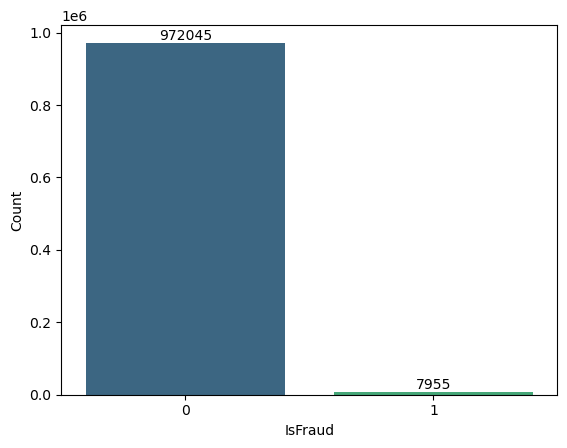

In [43]:
figure=sns.countplot(x=df['IsFraud'] , data=df , palette='viridis')
figure.bar_label(figure.containers[0])
figure.bar_label(figure.containers[1])

plt.ylabel('Count')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   TransactionID     1000000 non-null  int64         
 1   CustomerID        1000000 non-null  int64         
 2   TransactionType   1000000 non-null  object        
 3   Amount            1000000 non-null  float64       
 4   MerchantCategory  980000 non-null   object        
 5   IsFraud           1000000 non-null  int64         
 6   TransactionDate   1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 53.4+ MB


# checking null values in dataset

In [12]:
df.isnull().sum()

TransactionID           0
CustomerID              0
TransactionType         0
Amount                  0
MerchantCategory    20000
IsFraud                 0
TransactionDate         0
dtype: int64

# checking duplicate value 


In [13]:
df.duplicated().sum()

np.int64(0)

# checking unique values in the merchant category column


In [14]:
df['MerchantCategory'].value_counts()

MerchantCategory
Travel           140214
Others           140210
Healthcare       140107
Electronics      140034
Entertainment    139933
Groceries        139832
Dining           139670
Name: count, dtype: int64

# checking percentage of null values in the dataset(in respect to single column only) 

In [15]:
print(f'{20000/1000000*100} % ')

2.0 % 


# dropping nullvalue

In [16]:
df.dropna(inplace=True )

In [17]:
df.isnull().sum()

TransactionID       0
CustomerID          0
TransactionType     0
Amount              0
MerchantCategory    0
IsFraud             0
TransactionDate     0
dtype: int64

# As describe(numeric_only) is not working here we have checked the stats report by a little customizing the function


In [18]:
df.drop(['TransactionID','CustomerID','TransactionDate'], axis=1).describe()


,Amount,IsFraud
count,980000.000000,980000.000000
mean,373.532089,0.008117
std,900.620111,0.089730
min,5.000069,0.000000
25%,23.778478,0.000000
50%,42.526902,0.000000
75%,274.760055,0.000000
max,4999.996271,1.000000


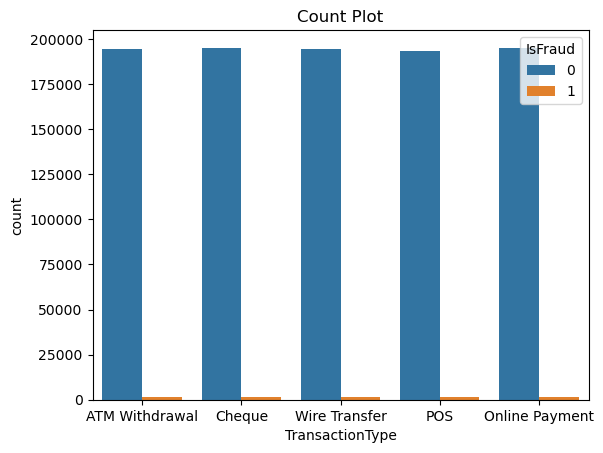

In [19]:
sns.countplot(data=df , x='TransactionType', hue='IsFraud' )
plt.title('Count Plot')
plt.show()

'''In every transaction category type we can see that there are fraud transactions atm .'''

In [20]:
df.head()

,TransactionID,CustomerID,TransactionType,Amount,MerchantCategory,IsFraud,TransactionDate
0,200000,110373,ATM Withdrawal,9.807356,Dining,0,2024-05-09 21:08:04.760169
1,200001,144536,Cheque,39.849237,Healthcare,0,2025-02-03 21:08:04.760188
2,200002,105148,Cheque,24.812904,Others,0,2025-03-20 21:08:04.760191
3,200003,105086,ATM Withdrawal,48.444194,Electronics,0,2024-11-12 21:08:04.760193
4,200004,143481,ATM Withdrawal,49.474473,Travel,0,2024-11-27 21:08:04.760194


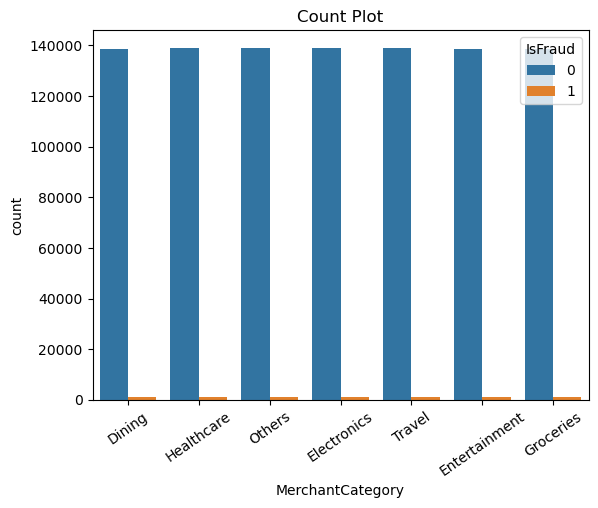

In [21]:
sns.countplot(data=df , x='MerchantCategory', hue='IsFraud')
plt.title('Count Plot')
plt.xticks(rotation=35)
plt.show()

''' In every merchant category fraud detected .'''

In [22]:
df.head()

,TransactionID,CustomerID,TransactionType,Amount,MerchantCategory,IsFraud,TransactionDate
0,200000,110373,ATM Withdrawal,9.807356,Dining,0,2024-05-09 21:08:04.760169
1,200001,144536,Cheque,39.849237,Healthcare,0,2025-02-03 21:08:04.760188
2,200002,105148,Cheque,24.812904,Others,0,2025-03-20 21:08:04.760191
3,200003,105086,ATM Withdrawal,48.444194,Electronics,0,2024-11-12 21:08:04.760193
4,200004,143481,ATM Withdrawal,49.474473,Travel,0,2024-11-27 21:08:04.760194


# Outliers in Amount feature

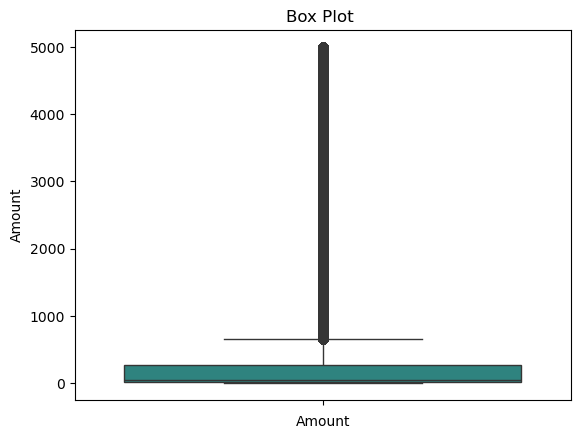

In [23]:
sns.boxplot ( data=df, y= 'Amount', palette='viridis' )
plt.xlabel ('Amount')
plt.title('Box Plot ')
plt.show()

In [24]:
from  scipy.stats import kurtosis
df['Amount'].kurtosis()
# means it is having very large number of outliers

np.float64(11.243067213001627)

# Frequency distribution of Amount

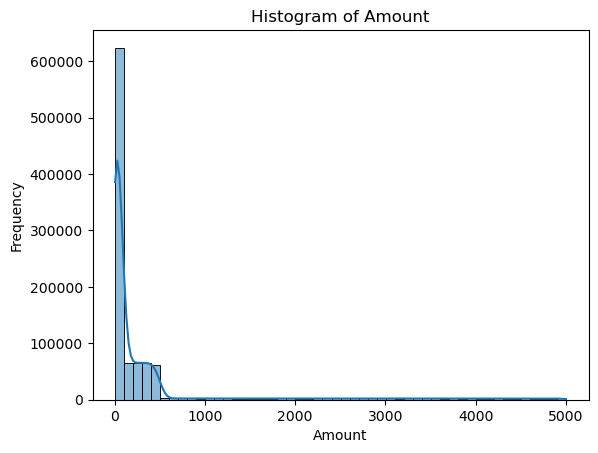

In [25]:
plt.figure()
sns.histplot(df['Amount'], bins=50,kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()


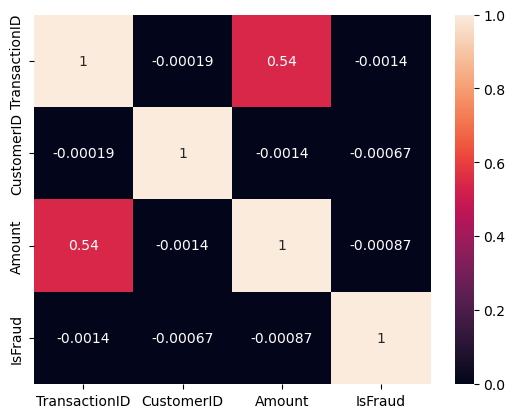

In [26]:
sns.heatmap(df.corr(numeric_only = True ) , annot= True )
plt.show()     # there is no point of showing correlation here it just shows there is highly negative realtionship between fraud and amount.

In [27]:
# lets see what happens if time is removed from transactiondate column

In [28]:
df['TransactionDate']=  (df['TransactionDate']).dt.date

In [29]:
df.head()

,TransactionID,CustomerID,TransactionType,Amount,MerchantCategory,IsFraud,TransactionDate
0,200000,110373,ATM Withdrawal,9.807356,Dining,0,2024-05-09
1,200001,144536,Cheque,39.849237,Healthcare,0,2025-02-03
2,200002,105148,Cheque,24.812904,Others,0,2025-03-20
3,200003,105086,ATM Withdrawal,48.444194,Electronics,0,2024-11-12
4,200004,143481,ATM Withdrawal,49.474473,Travel,0,2024-11-27


In [30]:
df['TransactionDate'].duplicated().sum()

np.int64(979634)

# maximum transaction occurred in a single day

In [31]:
df['TransactionDate'].value_counts().max()

2860

# minimum transaction occurred in a single day

In [32]:
df['TransactionDate'].value_counts().min()

2542

# average transaction in a day

In [33]:
average=np.mean(df['TransactionDate'].value_counts())

In [34]:
average

np.float64(2677.5956284153003)